## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import missingno as msno

## read data

In [2]:
df = pd.read_csv("car.csv")

## get informatio about data

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.sample(6)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
7297,Hyundai Verna 1.6 CRDi S Option,2015,600000,80000,Diesel,Individual,Manual,First Owner,23.9 kmpl,1582 CC,126.32 bhp,259.8Nm@ 1900-2750rpm,5.0
1625,Nissan Micra XV,2011,300000,60000,Petrol,Individual,Manual,Second Owner,18.06 kmpl,1198 CC,75 bhp,104Nm@ 4000rpm,5.0
1442,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
2899,Maruti Celerio X ZXI Option BSIV,2017,400000,52000,Petrol,Individual,Manual,First Owner,21.63 kmpl,998 CC,67 bhp,90Nm@ 3500rpm,5.0
6533,Mahindra XUV500 W10 2WD,2015,1147000,56975,Diesel,Individual,Manual,First Owner,16.0 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.0
4398,Tata Hexa XE,2017,980000,53000,Diesel,Individual,Manual,First Owner,17.6 kmpl,2179 CC,147.94 bhp,320Nm@ 1500-3000rpm,7.0


In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


## data cleaning 

### un necessary columns

In [8]:
df.drop('torque',axis=1,inplace=True)

### null data

In [9]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

<AxesSubplot:>

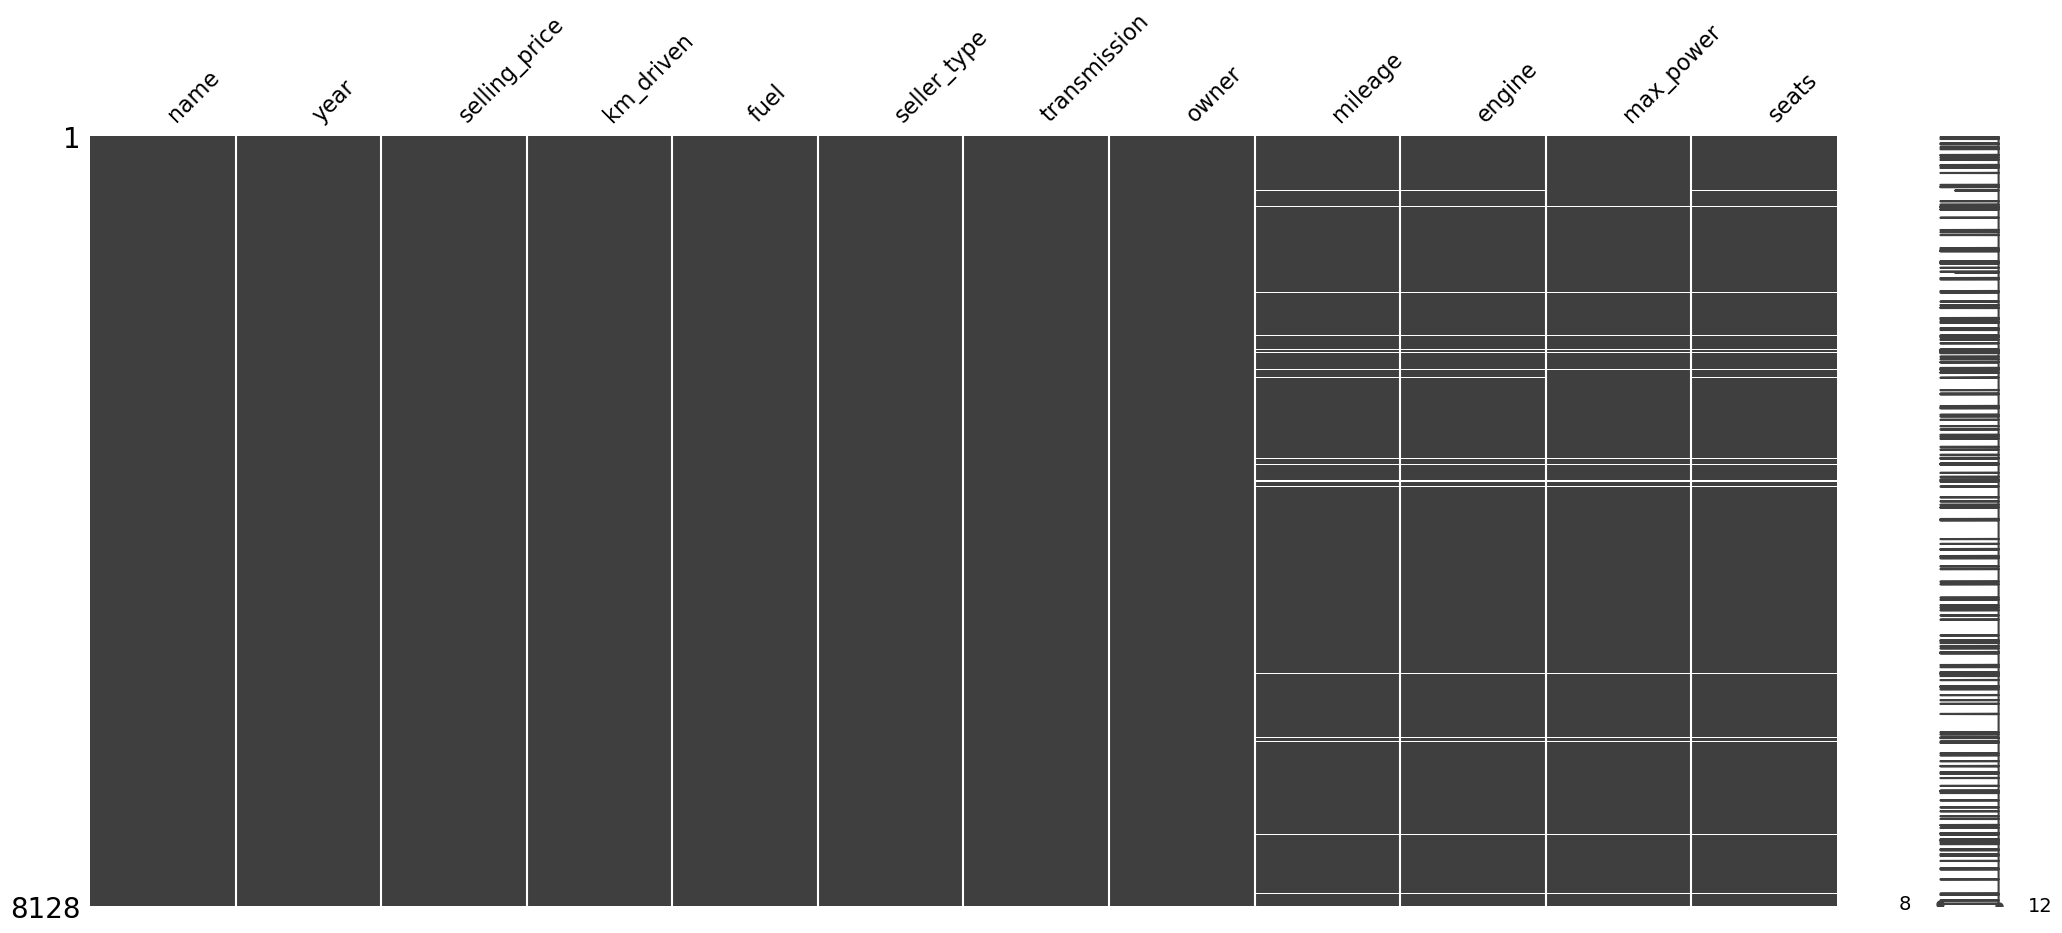

In [10]:
msno.matrix(df)

In [11]:
# fill numeric data with median and categorical data with most frequent
numeric_col=[col for col in df.select_dtypes(['int','float'])]
category_col=[col for col in df.select_dtypes(exclude=['int','float'])]

for col in numeric_col:
    df[col].fillna(df[col].median(),inplace=True)
    
for col in category_col:
    df[col].fillna(df[col].value_counts().index[0],inplace=True)

In [12]:
df.isnull().sum().sum()

0

#### -> null data is handled

## dulicated rows

In [13]:
df[df.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [14]:
df.drop_duplicates(inplace=True)

#### -> duplicated rows droped

## validate columns types

In [15]:
df['engine']=df['engine'].str.extract('([^\s]+)').astype("float")
df['mileage']=df['mileage'].str.extract('([^\s]+)').astype("float")

In [16]:
df["max_power"] = df["max_power"].str.extract('([^\s]+)')
df["max_power"] = df["max_power"][~(df["max_power"] == "bhp")]
df["max_power"] = df["max_power"].astype("float")

#### -> all types is valid

------------
## data visualiztion

In [141]:
fig = px.pie(df, values=np.ones(6926), names='fuel', title='Fuel types cars use', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


#### -  most cars sold uses diesel


In [142]:
fig = px.pie(df, values=np.ones(6926), names='seller_type', title='seller types of used cars', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### most cars selled by individuals

In [143]:
fig = px.pie(df, values=np.ones(6926), names='owner', title='Owners types cars sold by', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### most cars sold by first owner

In [144]:
fig = px.pie(df, values=np.ones(6926), names='seats', title='Seats types of sold cars', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### most cars have 5 seats

In [145]:
fig = px.pie(df, values=np.ones(6926), names='transmission', title='transmission type of cars', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### most cars is manual trasmission

------------
## relation between Possibilities and car 

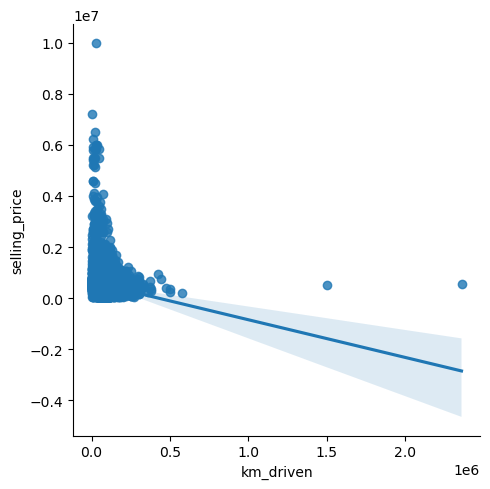

In [189]:
sns.regplot(x='km_driven',y='selling_price',data=df,color='#5F220D')

### -> the price is decrease by increasing kms driven


<AxesSubplot:xlabel='mileage', ylabel='selling_price'>

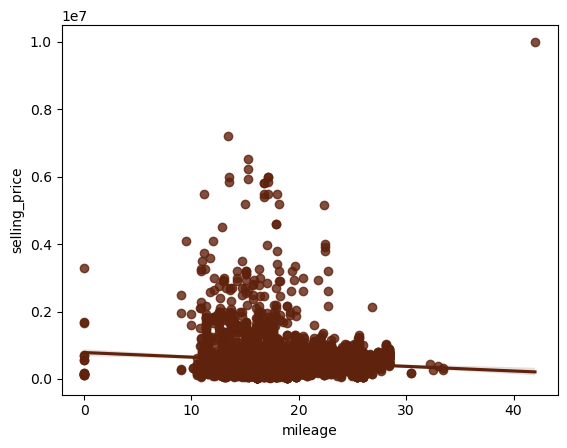

In [147]:
sns.regplot(x='mileage',y='selling_price',data=df,color='#5F220D')

### -> week reverse relationship between mileage and price

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

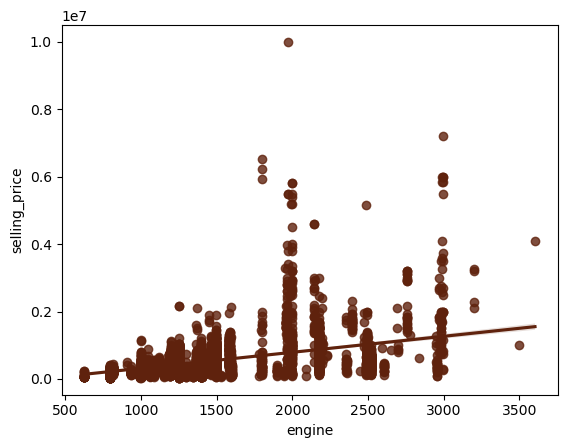

In [148]:
sns.regplot(x='engine',y='selling_price',data=df,color='#5F220D')

a positive relashion between engine power and price

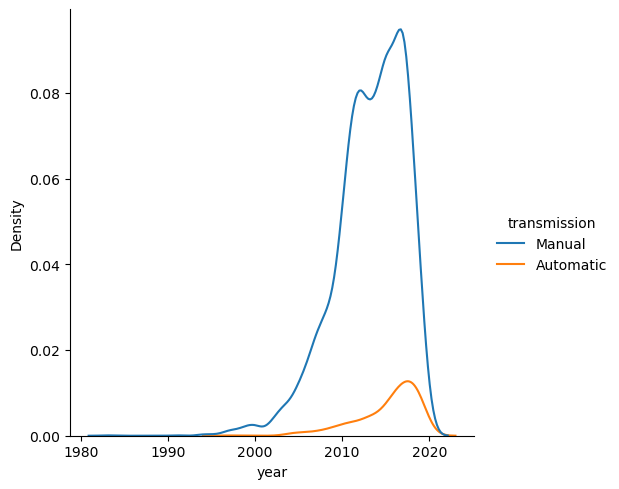

In [131]:
sns.displot(data = df, x = "year", hue = "transmission", kind = "kde")

### most sold cars was manual transmission type 

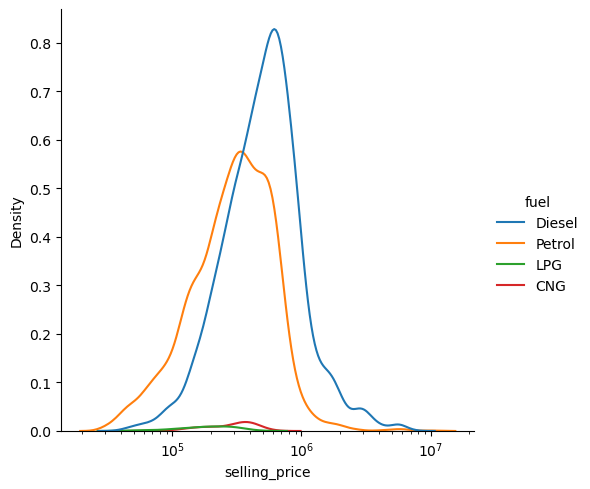

In [175]:
sns.displot(data = df, x = "selling_price", hue = "fuel", kind = "kde",log_scale=10)

### cars uses petrol usualy have a higher price

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



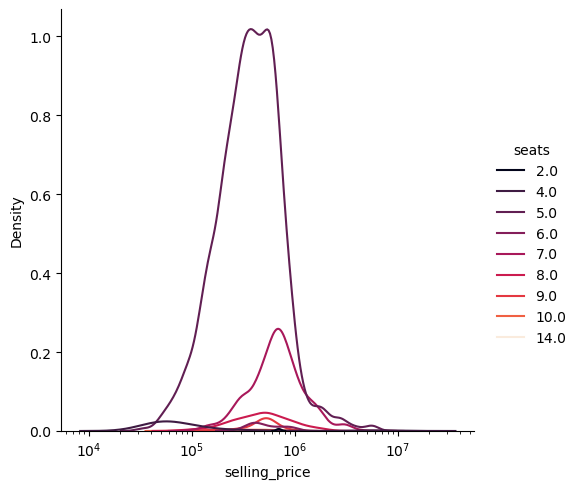

In [186]:

sns.displot(data = df, x = "selling_price", hue = "seats", kind = "kde",log_scale=10,palette='rocket')

### cars have 5 seats have the higher price

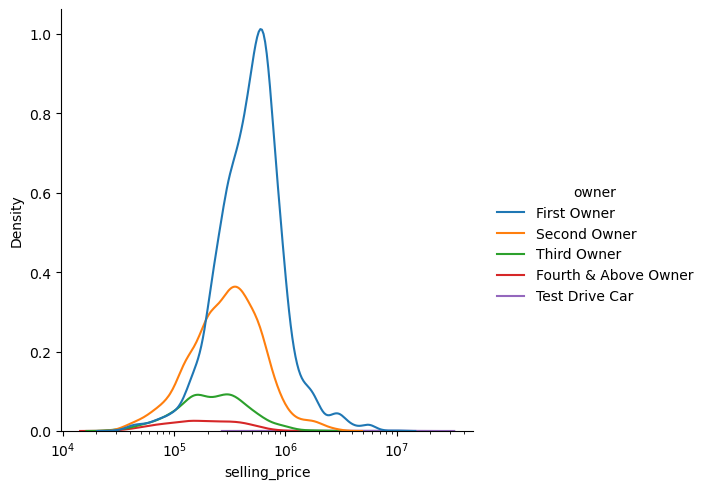

In [173]:
sns.displot(data = df, x = "selling_price", hue = "owner", kind = "kde",log_scale=10)

###  cars sold by the first owner have the higher price

## data correlation 

<AxesSubplot:>

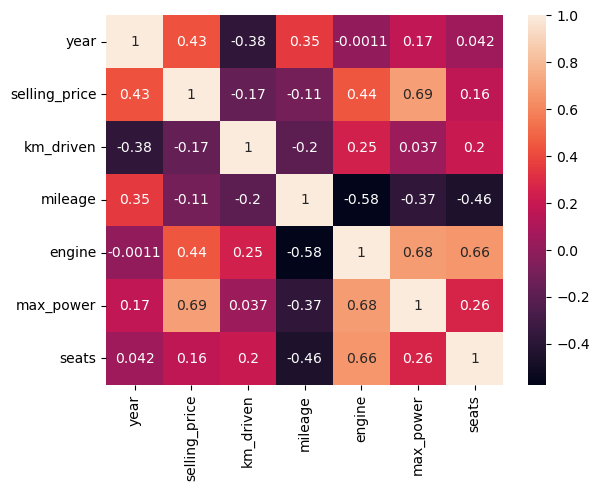

In [184]:
sns.heatmap(df.corr(),annot=True)

## notes:
### - there is strong possitive relation between max power and price
### - there is strong possitive relation between max power and engine 
### - there is strong possitive relation between engine power and seats : becouase the higher number of passengers need higher engine power